In [3]:
!pip install -q kaggle
#Installs the kaggle Python package so you can access datasets directly
# from Kaggle competitions using code.
from google.colab import files
files.upload()  # Upload kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
#
!kaggle competitions download -c titanic
!unzip -q titanic.zip

Saving titanic.zip to titanic (1).zip
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 433, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [5]:
import pandas as pd
import numpy as np

titanic_data = pd.read_csv('train.csv')
print(titanic_data.head(6))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN       

In [6]:
print(titanic_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
print(titanic_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [8]:
# Simulate extra demographic data (for integration example)
demographics = titanic_data[['PassengerId']].copy()
demographics['Has_Pets'] = np.random.choice([True, False], size=len(demographics))
# Merge
titanic_data = pd.merge(titanic_data, demographics, on='PassengerId', how='left')
print(titanic_data[['PassengerId', 'Has_Pets']].head())

   PassengerId  Has_Pets
0            1     False
1            2     False
2            3     False
3            4     False
4            5      True


In [9]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Pets
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True


In [10]:
## 2.Add a duplicate of the first row
titanic_data = pd.concat([titanic_data, titanic_data.iloc[[0]]], ignore_index=True)

# Check for duplicate rows
duplicate_mask = titanic_data.duplicated()

# Print number of duplicate rows
print("Number of duplicate rows:", duplicate_mask.sum())

# Optionally, view the duplicated rows
print(titanic_data[duplicate_mask])

Number of duplicate rows: 1
     PassengerId  Survived  Pclass                     Name   Sex   Age  \
891            1         0       3  Braund, Mr. Owen Harris  male  22.0   

     SibSp  Parch     Ticket  Fare Cabin Embarked  Has_Pets  
891      1      0  A/5 21171  7.25   NaN        S     False  


In [11]:
titanic_data = titanic_data.drop_duplicates()
print("Remaining duplicates:", titanic_data.duplicated().sum())

Remaining duplicates: 0


In [12]:
# Remove Irrelevant Columns
titanic_data = titanic_data.drop(['Cabin', 'Ticket'], axis=1, errors='ignore')
print("Columns after removal:", titanic_data.columns)

Columns after removal: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'Has_Pets'],
      dtype='object')


In [15]:
# Fixing Structural Errors - simulate 'Date' column
titanic_data['Date'] = pd.date_range(start='1/1/1912', periods=len(titanic_data), freq='D')
titanic_data['Date'] = pd.to_datetime(titanic_data['Date'])
print(titanic_data[['Date']].head())

# titanic_data['Date']

        Date
0 1912-01-01
1 1912-01-02
2 1912-01-03
3 1912-01-04
4 1912-01-05


In [19]:
# Identify Missing
print("Missing values per column:")
print(titanic_data.isnull().sum())

# Fill with mean
titanic_filled = titanic_data.copy()
titanic_filled['Age'] = titanic_filled['Age'].fillna(titanic_filled['Age'].mean())
print("Nulls in Age after filling:", titanic_filled['Age'].isnull() .sum())

# Drop rows with missing values
titanic_dropna = titanic_data.dropna()
print("Shape after dropping rows with missing data:", titanic_dropna.shape)

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Has_Pets         0
Date             0
dtype: int64
Nulls in Age after filling: 0
Shape after dropping rows with missing data: (712, 12)


In [17]:
# Check for missing values in a DataFrame
missing_data = titanic_data.isnull()
print(missing_data.head())

# Count missing values in each column
missing_counts = titanic_data.isnull().sum()
print(missing_counts)

   PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch   Fare  \
0        False     False   False  False  False  False  False  False  False   
1        False     False   False  False  False  False  False  False  False   
2        False     False   False  False  False  False  False  False  False   
3        False     False   False  False  False  False  False  False  False   
4        False     False   False  False  False  False  False  False  False   

   Embarked  Has_Pets   Date  
0     False     False  False  
1     False     False  False  
2     False     False  False  
3     False     False  False  
4     False     False  False  
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Has_Pets         0
Date             0
dtype: int64


In [20]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
df_numeric = titanic_data.select_dtypes(include=['float64', 'int64'])
imputed_array = imputer.fit_transform(df_numeric)
df_imputed = pd.DataFrame(imputed_array, columns=df_numeric.columns)
print(df_imputed.head())

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0          1.0       0.0     3.0  22.0    1.0    0.0   7.2500
1          2.0       1.0     1.0  38.0    1.0    0.0  71.2833
2          3.0       1.0     3.0  26.0    0.0    0.0   7.9250
3          4.0       1.0     1.0  35.0    1.0    0.0  53.1000
4          5.0       0.0     3.0  35.0    0.0    0.0   8.0500


In [21]:
# 1. Q1 and Q3
Q1 = titanic_data['Fare'].quantile(0.25)
Q3 = titanic_data['Fare'].quantile(0.75)

# 2. Bounds
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Count Outliers
filtered_fare = titanic_data[(titanic_data['Fare'] >= lower_bound) & (titanic_data['Fare'] <= upper_bound)]
print("Original shape:", titanic_data.shape)
print("Shape after removing fare outliers:", filtered_fare.shape)

Original shape: (891, 12)
Shape after removing fare outliers: (775, 12)


In [22]:
# 1. Q1 and Q3
Q1_age = titanic_data['Age'].quantile(0.25)
Q3_age = titanic_data['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

# 2. Bounds
lower_age = Q1_age - 1.5 * IQR_age
upper_age = Q3_age + 1.5 * IQR_age

# 3. Count Outliers
age_outliers = titanic_data[(titanic_data['Age'] < lower_age) | (titanic_data['Age'] > upper_age)]
print("Number of Age outliers:", age_outliers.shape[0])
print(age_outliers[['Age']].head())

Number of Age outliers: 11
      Age
33   66.0
54   65.0
96   71.0
116  70.5
280  65.0


In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
# Create a sample dataset
np.random.seed(42) # genegate 42 rows
data = {
    'CustomerID': range(1, 11),
    'Age': np.random.randint(18, 70, 10),
    'Annual_Income': np.random.randint(30000, 120000, 10),
    'Spending_Score': np.random.randint(1, 100, 10),
    'Purchase_Amount': np.random.randint(100, 1000, 10),
    'Purchase_Date': pd.date_range(start='2024-01-01', periods=10, freq='15D')
}
df = pd.DataFrame(data)
df

,CustomerID,Age,Annual_Income,Spending_Score,Purchase_Amount,Purchase_Date
0,1,56,67194,30,352,2024-01-01
1,2,69,117498,38,847,2024-01-16
2,3,46,74131,2,956,2024-01-31
3,4,32,90263,64,660,2024-02-15
4,5,60,46023,60,574,2024-03-01
5,6,25,71090,21,158,2024-03-16
6,7,38,97221,33,610,2024-03-31
7,8,56,94820,76,781,2024-04-15
8,9,36,30769,58,575,2024-04-30
9,10,40,89735,22,799,2024-05-15


In [24]:
# 1. Data Normalization (Min-Max Scaling)
scaler = MinMaxScaler()
df[['Age_norm', 'Annual_Income_norm', 'Spending_Score_norm']] = scaler.fit_transform(
    df[['Age', 'Annual_Income', 'Spending_Score']]
)
df

,CustomerID,Age,Annual_Income,Spending_Score,Purchase_Amount,Purchase_Date,Age_norm,Annual_Income_norm,Spending_Score_norm
0,1,56,67194,30,352,2024-01-01,0.704545,0.419986,0.378378
1,2,69,117498,38,847,2024-01-16,1.000000,1.000000,0.486486
2,3,46,74131,2,956,2024-01-31,0.477273,0.499971,0.000000
3,4,32,90263,64,660,2024-02-15,0.159091,0.685976,0.837838
4,5,60,46023,60,574,2024-03-01,0.795455,0.175881,0.783784
5,6,25,71090,21,158,2024-03-16,0.000000,0.464908,0.256757
6,7,38,97221,33,610,2024-03-31,0.295455,0.766203,0.418919
7,8,56,94820,76,781,2024-04-15,0.704545,0.738519,1.000000
8,9,36,30769,58,575,2024-04-30,0.250000,0.000000,0.756757
9,10,40,89735,22,799,2024-05-15,0.340909,0.679888,0.270270


In [26]:
# 2. Data Reduction using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df[['Age_norm', 'Annual_Income_norm', 'Spending_Score_norm']])
df[['PCA1', 'PCA2']] = pca_features
df

,CustomerID,Age,Annual_Income,Spending_Score,Purchase_Amount,Purchase_Date,Age_norm,Annual_Income_norm,Spending_Score_norm,PCA1,PCA2
0,1,56,67194,30,352,2024-01-01,0.704545,0.419986,0.378378,0.074596,-0.057916
1,2,69,117498,38,847,2024-01-16,1.000000,1.000000,0.486486,0.569244,-0.404334
2,3,46,74131,2,956,2024-01-31,0.477273,0.499971,0.000000,-0.261220,-0.355269
3,4,32,90263,64,660,2024-02-15,0.159091,0.685976,0.837838,-0.047427,0.189020
4,5,60,46023,60,574,2024-03-01,0.795455,0.175881,0.783784,0.255851,0.387986
5,6,25,71090,21,158,2024-03-16,0.000000,0.464908,0.256757,-0.532857,-0.070319
6,7,38,97221,33,610,2024-03-31,0.295455,0.766203,0.418919,-0.111092,-0.193580
7,8,56,94820,76,781,2024-04-15,0.704545,0.738519,1.000000,0.486541,0.191393
8,9,36,30769,58,575,2024-04-30,0.250000,0.000000,0.756757,-0.256884,0.566441
9,10,40,89735,22,799,2024-05-15,0.340909,0.679888,0.270270,-0.176754,-0.253423


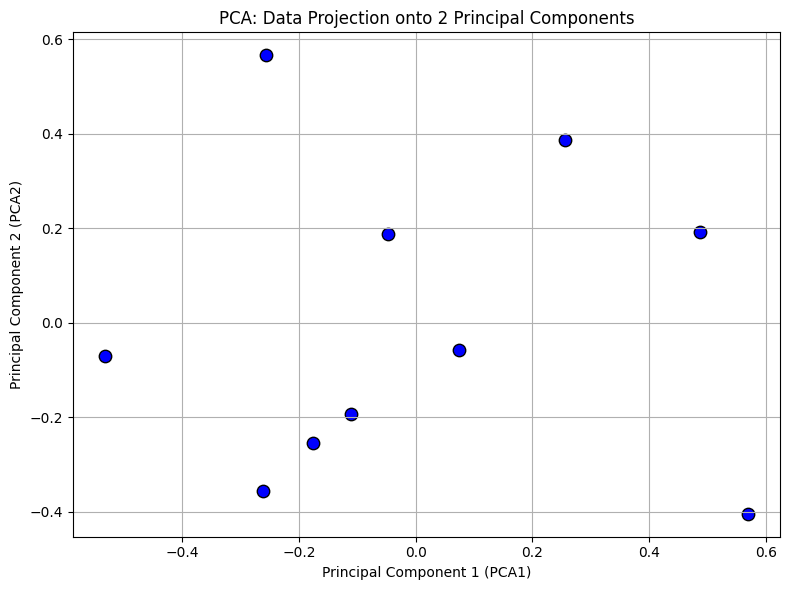

In [27]:
import matplotlib.pyplot as plt
# Plotting PCA1 vs PCA2 with labels
plt.figure(figsize=(8, 6))
plt.scatter(df['PCA1'], df['PCA2'], c='blue', edgecolors='k', s=80)
plt.title('PCA: Data Projection onto 2 Principal Components')
plt.xlabel('Principal Component 1 (PCA1)')
plt.ylabel('Principal Component 2 (PCA2)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
# 3. Data Aggregation - Group by Month and calculate total Purchase_Amount
df['Month'] = df['Purchase_Date'].dt.to_period('M')
monthly_agg = df.groupby('Month').agg({'Purchase_Amount': ['max', 'min']})
monthly_agg

Purchase_Amount     
                    max  min
Month                       
2024-01             956  352
2024-02             660  660
2024-03             610  158
2024-04             781  575
2024-05             799  799

In [34]:
from google.colab import files
files.upload()

!unzip -q Weather.zip

Saving Weather.zip to Weather.zip


In [36]:
import pandas as pd
import numpy as np

weather_data = pd.read_csv('Weather Dataset/weatherHistory.csv')
print(weather_data.head(6))

                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   
5  2006-04-01 05:00:00.000 +0200  Partly Cloudy        rain         9.222222   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   
5                  7.111111      0.85            13.9587   

   Wind Bearing (d

In [38]:
print(weather_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB
None


In [39]:
print(weather_data.describe())

       Temperature (C)  Apparent Temperature (C)      Humidity  \
count     96453.000000              96453.000000  96453.000000   
mean         11.932678                 10.855029      0.734899   
std           9.551546                 10.696847      0.195473   
min         -21.822222                -27.716667      0.000000   
25%           4.688889                  2.311111      0.600000   
50%          12.000000                 12.000000      0.780000   
75%          18.838889                 18.838889      0.890000   
max          39.905556                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count       96453.000000            96453.000000     96453.000000     96453.0   
mean           10.810640              187.509232        10.347325         0.0   
std             6.913571              107.383428         4.192123         0.0   
min             0.000000                0.000000         0.000000         0.0   


In [40]:
weather_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [45]:
# 1. Data Normalization (Min-Max Scaling)
scaler = MinMaxScaler()
weather_data[['Temperature (C)_norm', 'Wind Speed (km/h)_norm', 'Pressure (millibars)_norm']] = scaler.fit_transform(
    weather_data[['Temperature (C)', 'Wind Speed (km/h)', 'Pressure (millibars)']]
)
weather_data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Humidity_norm,Temperature (C)_norm,Wind Speed (km/h)_norm,Pressure (millibars)_norm
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,0.89,0.506975,0.221130,0.970135
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,0.86,0.505085,0.223399,0.970613
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,0.89,0.505445,0.061523,0.970909
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,0.83,0.487805,0.220877,0.971358
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,0.83,0.495365,0.172970,0.971454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,0.43,0.774998,0.172214,0.969399
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,0.48,0.751778,0.158094,0.970164
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,0.56,0.710557,0.140696,0.970642
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,0.60,0.702187,0.164902,0.970919


In [47]:
# 2. Data Reduction using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(weather_data[['Temperature (C)_norm', 'Wind Speed (km/h)_norm', 'Pressure (millibars)_norm']])
weather_data[['PCA1', 'PCA2']] = pca_features
weather_data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Humidity_norm,Temperature (C)_norm,Wind Speed (km/h)_norm,Pressure (millibars)_norm,PCA1,PCA2
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,0.89,0.506975,0.221130,0.970135,-0.039297,-0.015273
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,0.86,0.505085,0.223399,0.970613,-0.041163,-0.015961
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,0.89,0.505445,0.061523,0.970909,-0.042863,0.061488
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,0.83,0.487805,0.220877,0.971358,-0.058479,-0.014343
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,0.83,0.495365,0.172970,0.971454,-0.051530,0.008688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,0.43,0.774998,0.172214,0.969399,0.228078,0.011123
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,0.48,0.751778,0.158094,0.970164,0.204674,0.018205
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,0.56,0.710557,0.140696,0.970642,0.163233,0.026349
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,0.60,0.702187,0.164902,0.970919,0.155169,0.014935


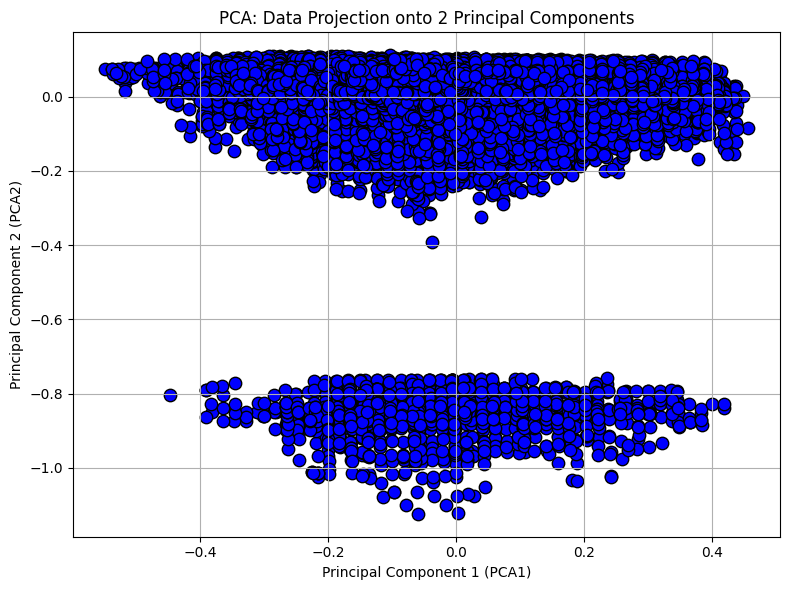

In [48]:
import matplotlib.pyplot as plt
# Plotting PCA1 vs PCA2 with labels
plt.figure(figsize=(8, 6))
plt.scatter(weather_data['PCA1'], weather_data['PCA2'], c='blue', edgecolors='k', s=80)
plt.title('PCA: Data Projection onto 2 Principal Components')
plt.xlabel('Principal Component 1 (PCA1)')
plt.ylabel('Principal Component 2 (PCA2)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
# 3. Data Aggregation - Group by Month and calculate total Purchase_Amount
weather_data['Precip'] = weather_data['Precip Type']

daily_agg = weather_data.groupby('Precip').agg({'Temperature (C)': 'mean'})
daily_agg


,Temperature (C)
Precip,
rain,13.852989
snow,-3.270885


In [57]:
# # 3. Data Aggregation - Group by Month and calculate total Purchase_Amount

weather_data['Formatted Date'] = pd.to_datetime(weather_data['Formatted Date'], utc=True)
weather_data['Month'] = weather_data['Formatted Date'].dt.to_period('M')

daily_agg = weather_data.groupby('Month').agg({'Temperature (C)': 'mean'})
daily_agg


<ipython-input-57-5bdbd33d6c27>:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  weather_data['Month'] = weather_data['Formatted Date'].dt.to_period('M')


,Temperature (C)
Month,
2005-12,0.577778
2006-01,-1.677942
2006-02,-0.065394
2006-03,4.559274
2006-04,12.635031
...,...
2016-08,21.420296
2016-09,18.467924
2016-10,9.893242
